<center>

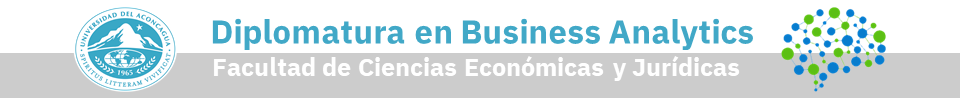

</center>

<center>
<font color="#41a8c7">
<h2><b>
Trabajo Final - Módulo 7 - Introducción a Python y Pandas

</font>
</center>

~~~
González, Analía del Valle
~~~

# Activar módulos necesarios

In [1]:
import numpy as np
import pandas as pd

# Obtener datos

In [2]:
datos_url='https://raw.githubusercontent.com/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/main/Modulo_07_Introduccion_a_Python/Analisis_de_Facturas_de_Venta.csv'

# Crear un DataFrame

In [3]:
fact_ventas = pd.read_csv(datos_url)

## Visualizaciones del DataFrame

In [4]:
fact_ventas

,DOCUMENTO,ORGANIZACION,FECHA,TIPOFACTURA,PRODUCTO,CANTIDAD,PRECIO,IMPORTEMONTRANSACCION,MONEDA
0,B-0001-00000102,Etigand S.A.,27/12/19,Factura,Consultoria Web,50.0,5785.1240,289256.20,Pesos Argentinos
1,B-0001-00000101,Javier Moroni,21/12/19,Factura,Honorarios,1.0,99586.7769,99586.78,Pesos Argentinos
2,A-0001-00000231,Amazon Group,10/12/19,Factura,Parlantes para PC,30.0,1990.0000,59700.00,Pesos Argentinos
3,A-0001-00000230,Amazon Group,6/12/19,Factura,Mercaderia de Reventa,30.0,10358.0000,310740.00,Pesos Argentinos
4,A-0001-00000229,Manganello S.R.L,20/11/19,Factura,Consultoria Web,50.0,6300.0000,315000.00,Pesos Argentinos
...,...,...,...,...,...,...,...,...,...
154,A-0001-00000128,Hernandez S.A.,31/1/18,Factura,Dise–o Web,5.0,6300.0000,31500.00,Pesos Argentinos
155,B-0001-00000069,Etigand S.A.,25/1/18,Factura,Impresora Multifuncion,8.0,3553.7190,28429.75,Pesos Argentinos
156,B-0001-00000069,Etigand S.A.,25/1/18,Factura,Monitores,8.0,3305.7851,26446.28,Pesos Argentinos
157,B-0001-00000068,Ferrari Hnos S.A.,1/1/18,Factura,Impresora Multifuncion,10.0,3553.7190,35537.19,Pesos Argentinos


## Información del DataFrame y de los datos

In [5]:
fact_ventas.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DOCUMENTO              159 non-null    object 
 1   ORGANIZACION           159 non-null    object 
 2   FECHA                  159 non-null    object 
 3   TIPOFACTURA            159 non-null    object 
 4   PRODUCTO               159 non-null    object 
 5   CANTIDAD               159 non-null    float64
 6   PRECIO                 159 non-null    float64
 7   IMPORTEMONTRANSACCION  159 non-null    float64
 8   MONEDA                 159 non-null    object 
dtypes: float64(3), object(6)
memory usage: 11.3+ KB


 *El Data Frame tiene 159 registros (empieza en 0 y termina en 158) tiene 9 columnas con 159 datos, sin datos nulos.*

In [6]:
fact_ventas.FECHA = pd.to_datetime(fact_ventas.FECHA)
fact_ventas = fact_ventas.sort_values (by= 'FECHA', ascending=True)
fact_ventas.CANTIDAD = fact_ventas.CANTIDAD.astype('int32')
fact_ventas.PRECIO = round(fact_ventas.PRECIO,2)

In [7]:
fact_ventas

,DOCUMENTO,ORGANIZACION,FECHA,TIPOFACTURA,PRODUCTO,CANTIDAD,PRECIO,IMPORTEMONTRANSACCION,MONEDA
158,B-0001-00000068,Ferrari Hnos S.A.,2018-01-01,Factura,Monitores,8,3305.79,26446.28,Pesos Argentinos
157,B-0001-00000068,Ferrari Hnos S.A.,2018-01-01,Factura,Impresora Multifuncion,10,3553.72,35537.19,Pesos Argentinos
147,A-0001-00000133,Donadelli S.R.L,2018-01-03,Factura,Publicidad y Marketing,1,65000.00,65000.00,Pesos Argentinos
137,A-0001-00000140,Berker S.R.L,2018-01-05,Factura,Consultoria Web,1,15000.00,15000.00,Pesos Argentinos
130,B-0001-00000075,Javier Moroni,2018-01-06,Factura,Dise–o Web,1,13223.14,13223.14,Pesos Argentinos
...,...,...,...,...,...,...,...,...,...
5,A-0001-00000228,Galardon S.A.,2019-11-17,Factura,Impresora Multifuncion,23,10209.00,234807.00,Pesos Argentinos
4,A-0001-00000229,Manganello S.R.L,2019-11-20,Factura,Consultoria Web,50,6300.00,315000.00,Pesos Argentinos
41,A-0001-00000202,Nicolasen y Asociados S.A.,2019-12-04,Factura,Mercaderia de Reventa,25,2059.00,51475.00,Pesos Argentinos
1,B-0001-00000101,Javier Moroni,2019-12-21,Factura,Honorarios,1,99586.78,99586.78,Pesos Argentinos


*Cambio el tipo de datos de las columnas FECHA y CANTIDAD. Ordeno los datos del DF por fecha de forma ascendente y cambio el número de decimales del precio a 2.*


In [8]:
fact_ventas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 158 to 0
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DOCUMENTO              159 non-null    object        
 1   ORGANIZACION           159 non-null    object        
 2   FECHA                  159 non-null    datetime64[ns]
 3   TIPOFACTURA            159 non-null    object        
 4   PRODUCTO               159 non-null    object        
 5   CANTIDAD               159 non-null    int32         
 6   PRECIO                 159 non-null    float64       
 7   IMPORTEMONTRANSACCION  159 non-null    float64       
 8   MONEDA                 159 non-null    object        
dtypes: datetime64[ns](1), float64(2), int32(1), object(5)
memory usage: 11.8+ KB


# Trabajando con el DataFrame

## Eliminando datos no disponibles y duplicados

In [9]:
fact_ventas.nunique() #hay datos duplicados

DOCUMENTO                138
ORGANIZACION              20
FECHA                    127
TIPOFACTURA                1
PRODUCTO                  23
CANTIDAD                  23
PRECIO                   125
IMPORTEMONTRANSACCION    134
MONEDA                     2
dtype: int64

In [10]:
fact_ventas = fact_ventas.drop_duplicates('DOCUMENTO') 


In [11]:
fact_ventas = fact_ventas.reset_index(drop=True)

*Borro las facturas duplicadas.*

In [12]:
fact_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DOCUMENTO              138 non-null    object        
 1   ORGANIZACION           138 non-null    object        
 2   FECHA                  138 non-null    datetime64[ns]
 3   TIPOFACTURA            138 non-null    object        
 4   PRODUCTO               138 non-null    object        
 5   CANTIDAD               138 non-null    int32         
 6   PRECIO                 138 non-null    float64       
 7   IMPORTEMONTRANSACCION  138 non-null    float64       
 8   MONEDA                 138 non-null    object        
dtypes: datetime64[ns](1), float64(2), int32(1), object(5)
memory usage: 9.3+ KB


## Insertando columnas

In [13]:
fact_ventas['CONDICION_DE_VENTA']=np.where (fact_ventas.IMPORTEMONTRANSACCION > 200000 ,'Cta Cte', 'Contado')
fact_ventas


,DOCUMENTO,ORGANIZACION,FECHA,TIPOFACTURA,PRODUCTO,CANTIDAD,PRECIO,IMPORTEMONTRANSACCION,MONEDA,CONDICION_DE_VENTA
0,B-0001-00000068,Ferrari Hnos S.A.,2018-01-01,Factura,Monitores,8,3305.79,26446.28,Pesos Argentinos,Contado
1,A-0001-00000133,Donadelli S.R.L,2018-01-03,Factura,Publicidad y Marketing,1,65000.00,65000.00,Pesos Argentinos,Contado
2,A-0001-00000140,Berker S.R.L,2018-01-05,Factura,Consultoria Web,1,15000.00,15000.00,Pesos Argentinos,Contado
3,B-0001-00000075,Javier Moroni,2018-01-06,Factura,Dise–o Web,1,13223.14,13223.14,Pesos Argentinos,Contado
4,B-0001-00000079,Javier Moroni,2018-01-07,Factura,Publicidad y Marketing,1,23140.50,23140.50,Pesos Argentinos,Contado
...,...,...,...,...,...,...,...,...,...,...
133,A-0001-00000228,Galardon S.A.,2019-11-17,Factura,Impresora Multifuncion,23,10209.00,234807.00,Pesos Argentinos,Cta Cte
134,A-0001-00000229,Manganello S.R.L,2019-11-20,Factura,Consultoria Web,50,6300.00,315000.00,Pesos Argentinos,Cta Cte
135,A-0001-00000202,Nicolasen y Asociados S.A.,2019-12-04,Factura,Mercaderia de Reventa,25,2059.00,51475.00,Pesos Argentinos,Contado
136,B-0001-00000101,Javier Moroni,2019-12-21,Factura,Honorarios,1,99586.78,99586.78,Pesos Argentinos,Contado


*Inserto una columna llamada CONDICION DE VENTA, en la que indico un supuesto de que las ventas menores a 200.000 pesos argentinos o dolares son de contado y las mayores en cta cte.*

## Renombrando columnas

In [14]:
fact_ventas = fact_ventas.rename(columns= {'DOCUMENTO':'FACTURA', 'ORGANIZACION':'CLIENTE','PRODUCTO':'PRODUCTO_SERVICIO','IMPORTEMONTRANSACCION':'TOTAL_FACTURA'})
fact_ventas

,FACTURA,CLIENTE,FECHA,TIPOFACTURA,PRODUCTO_SERVICIO,CANTIDAD,PRECIO,TOTAL_FACTURA,MONEDA,CONDICION_DE_VENTA
0,B-0001-00000068,Ferrari Hnos S.A.,2018-01-01,Factura,Monitores,8,3305.79,26446.28,Pesos Argentinos,Contado
1,A-0001-00000133,Donadelli S.R.L,2018-01-03,Factura,Publicidad y Marketing,1,65000.00,65000.00,Pesos Argentinos,Contado
2,A-0001-00000140,Berker S.R.L,2018-01-05,Factura,Consultoria Web,1,15000.00,15000.00,Pesos Argentinos,Contado
3,B-0001-00000075,Javier Moroni,2018-01-06,Factura,Dise–o Web,1,13223.14,13223.14,Pesos Argentinos,Contado
4,B-0001-00000079,Javier Moroni,2018-01-07,Factura,Publicidad y Marketing,1,23140.50,23140.50,Pesos Argentinos,Contado
...,...,...,...,...,...,...,...,...,...,...
133,A-0001-00000228,Galardon S.A.,2019-11-17,Factura,Impresora Multifuncion,23,10209.00,234807.00,Pesos Argentinos,Cta Cte
134,A-0001-00000229,Manganello S.R.L,2019-11-20,Factura,Consultoria Web,50,6300.00,315000.00,Pesos Argentinos,Cta Cte
135,A-0001-00000202,Nicolasen y Asociados S.A.,2019-12-04,Factura,Mercaderia de Reventa,25,2059.00,51475.00,Pesos Argentinos,Contado
136,B-0001-00000101,Javier Moroni,2019-12-21,Factura,Honorarios,1,99586.78,99586.78,Pesos Argentinos,Contado


In [15]:
fact_ventas = fact_ventas.drop(columns=['TIPOFACTURA'])


In [16]:
fact_ventas=fact_ventas [['FECHA','FACTURA','CLIENTE','PRODUCTO_SERVICIO','CONDICION_DE_VENTA','CANTIDAD','PRECIO','TOTAL_FACTURA','MONEDA']]
fact_ventas

,FECHA,FACTURA,CLIENTE,PRODUCTO_SERVICIO,CONDICION_DE_VENTA,CANTIDAD,PRECIO,TOTAL_FACTURA,MONEDA
0,2018-01-01,B-0001-00000068,Ferrari Hnos S.A.,Monitores,Contado,8,3305.79,26446.28,Pesos Argentinos
1,2018-01-03,A-0001-00000133,Donadelli S.R.L,Publicidad y Marketing,Contado,1,65000.00,65000.00,Pesos Argentinos
2,2018-01-05,A-0001-00000140,Berker S.R.L,Consultoria Web,Contado,1,15000.00,15000.00,Pesos Argentinos
3,2018-01-06,B-0001-00000075,Javier Moroni,Dise–o Web,Contado,1,13223.14,13223.14,Pesos Argentinos
4,2018-01-07,B-0001-00000079,Javier Moroni,Publicidad y Marketing,Contado,1,23140.50,23140.50,Pesos Argentinos
...,...,...,...,...,...,...,...,...,...
133,2019-11-17,A-0001-00000228,Galardon S.A.,Impresora Multifuncion,Cta Cte,23,10209.00,234807.00,Pesos Argentinos
134,2019-11-20,A-0001-00000229,Manganello S.R.L,Consultoria Web,Cta Cte,50,6300.00,315000.00,Pesos Argentinos
135,2019-12-04,A-0001-00000202,Nicolasen y Asociados S.A.,Mercaderia de Reventa,Contado,25,2059.00,51475.00,Pesos Argentinos
136,2019-12-21,B-0001-00000101,Javier Moroni,Honorarios,Contado,1,99586.78,99586.78,Pesos Argentinos


 *Elimino la columna Factura, considero que no es necesaria y reordeno las columnas.*

## Reindexando index

In [17]:
fact_ventas = fact_ventas.reset_index(drop=True)
fact_ventas

,FECHA,FACTURA,CLIENTE,PRODUCTO_SERVICIO,CONDICION_DE_VENTA,CANTIDAD,PRECIO,TOTAL_FACTURA,MONEDA
0,2018-01-01,B-0001-00000068,Ferrari Hnos S.A.,Monitores,Contado,8,3305.79,26446.28,Pesos Argentinos
1,2018-01-03,A-0001-00000133,Donadelli S.R.L,Publicidad y Marketing,Contado,1,65000.00,65000.00,Pesos Argentinos
2,2018-01-05,A-0001-00000140,Berker S.R.L,Consultoria Web,Contado,1,15000.00,15000.00,Pesos Argentinos
3,2018-01-06,B-0001-00000075,Javier Moroni,Dise–o Web,Contado,1,13223.14,13223.14,Pesos Argentinos
4,2018-01-07,B-0001-00000079,Javier Moroni,Publicidad y Marketing,Contado,1,23140.50,23140.50,Pesos Argentinos
...,...,...,...,...,...,...,...,...,...
133,2019-11-17,A-0001-00000228,Galardon S.A.,Impresora Multifuncion,Cta Cte,23,10209.00,234807.00,Pesos Argentinos
134,2019-11-20,A-0001-00000229,Manganello S.R.L,Consultoria Web,Cta Cte,50,6300.00,315000.00,Pesos Argentinos
135,2019-12-04,A-0001-00000202,Nicolasen y Asociados S.A.,Mercaderia de Reventa,Contado,25,2059.00,51475.00,Pesos Argentinos
136,2019-12-21,B-0001-00000101,Javier Moroni,Honorarios,Contado,1,99586.78,99586.78,Pesos Argentinos


# Grabando

## Grabar el DataFrame como un archivo SCV

In [18]:
fact_ventas.to_csv('Analía_González_Trabajo_Final.csv')

# Gráficos

## Desarrollar gráficos del DataFrame

In [19]:
import matplotlib.pyplot as plt



In [20]:
plt.style.use ('ggplot')

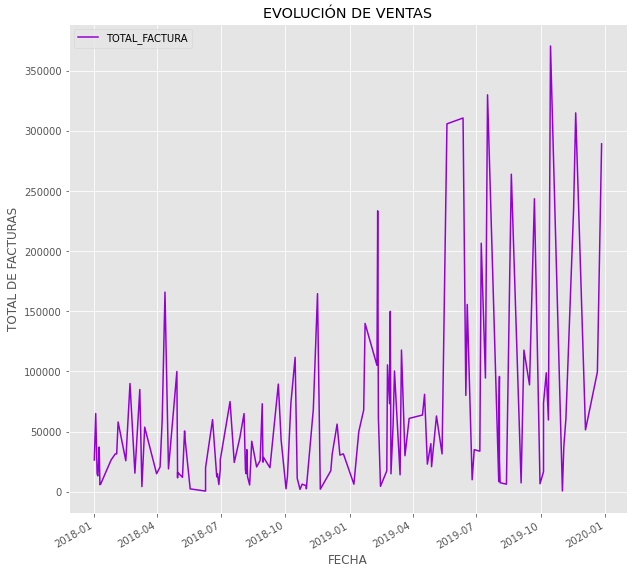

In [21]:
fact_ventas.plot('FECHA','TOTAL_FACTURA',
                 kind="line", 
                 figsize=(10,10), 
                 color="darkviolet", 
                 title="EVOLUCIÓN DE VENTAS", 
                 ylabel = "TOTAL DE FACTURAS",
                 xlabel = "FECHA")

In [22]:
agrupacion_condicion_de_venta = fact_ventas.groupby("CONDICION_DE_VENTA").sum()


In [23]:
agrupacion_condicion_de_venta.insert(0,column="CONDICION_DE_VENTA",value=agrupacion_condicion_de_venta.index.values)
agrupacion_condicion_de_venta.reset_index(drop =True,inplace=True)
agrupacion_condicion_de_venta.head()

,CONDICION_DE_VENTA,CANTIDAD,PRECIO,TOTAL_FACTURA
0,Contado,787,3271682.09,5499048.56
1,Cta Cte,299,188611.35,3104066.77


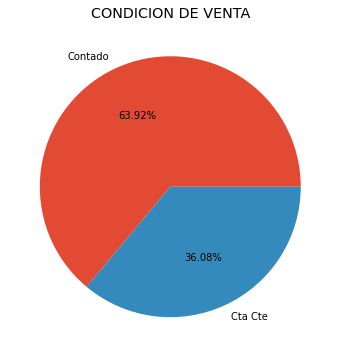

In [24]:
agrupacion_condicion_de_venta.plot("","TOTAL_FACTURA",
          kind="pie", 
          figsize=(6,6), 
          labels = agrupacion_condicion_de_venta.CONDICION_DE_VENTA,
          autopct = '%1.2f%%',
          legend = "",
          ylabel = "",
          title="CONDICION DE VENTA")

In [25]:
agrupacion_productos = fact_ventas.groupby("PRODUCTO_SERVICIO").sum()

In [26]:
agrupacion_productos.insert(0,column="PRODUCTO_SERVICIO",value=agrupacion_productos.index.values)
agrupacion_productos.reset_index(drop =True,inplace=True)
agrupacion_productos.head()

,PRODUCTO_SERVICIO,CANTIDAD,PRECIO,TOTAL_FACTURA
0,Cable RGB para video,95,2297.44,81371.32
1,Consultoria Digital,2,17500.00,17500.00
2,Consultoria Web,153,663285.79,1424066.87
3,Dise–o Web,17,220864.83,271264.83
4,Honorarios,12,764982.90,764982.90


In [27]:
agrupacion_productos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PRODUCTO_SERVICIO  23 non-null     object 
 1   CANTIDAD           23 non-null     int32  
 2   PRECIO             23 non-null     float64
 3   TOTAL_FACTURA      23 non-null     float64
dtypes: float64(2), int32(1), object(1)
memory usage: 772.0+ bytes


In [28]:
import altair as alt

In [29]:
alt.Chart(agrupacion_productos).mark_bar().encode(
  x="PRODUCTO_SERVICIO",
  y="TOTAL_FACTURA",
  color="PRODUCTO_SERVICIO",).interactive()
  

alt.Chart(...)

In [30]:
agrupacion_moneda = fact_ventas.groupby("MONEDA").sum()


In [31]:
agrupacion_moneda.insert(0,column="MONEDA",value=agrupacion_moneda.index.values)
agrupacion_moneda.reset_index(drop =True,inplace=True)
agrupacion_moneda.head()

,MONEDA,CANTIDAD,PRECIO,TOTAL_FACTURA
0,Dólares,5,2600.00,4400.00
1,Pesos Argentinos,1081,3457693.44,8598715.33


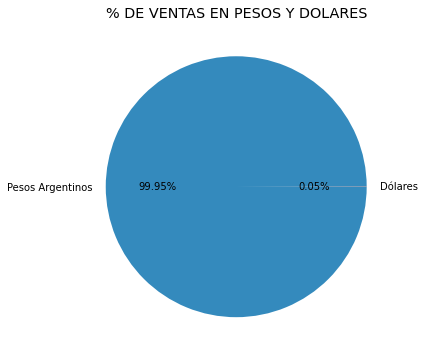

In [32]:
agrupacion_moneda.plot("","TOTAL_FACTURA",
          kind="pie", 
          figsize=(6,6), 
          labels = agrupacion_moneda.MONEDA,
          autopct = '%1.2f%%',
          legend = "",
          ylabel = "",
          title="% DE VENTAS EN PESOS Y DOLARES")